In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('./datas/지점별_일별판매량.csv', encoding='euc-kr')
df.head()

,일자,지점A,지점B,지점C
0,1,124,118,216
1,2,147,141,214
2,3,129,130,212
3,4,123,127,179
4,5,147,107,222


In [4]:
A = df['지점A'].dropna().values
B = df['지점B'].dropna().values
C = df['지점C'].dropna().values

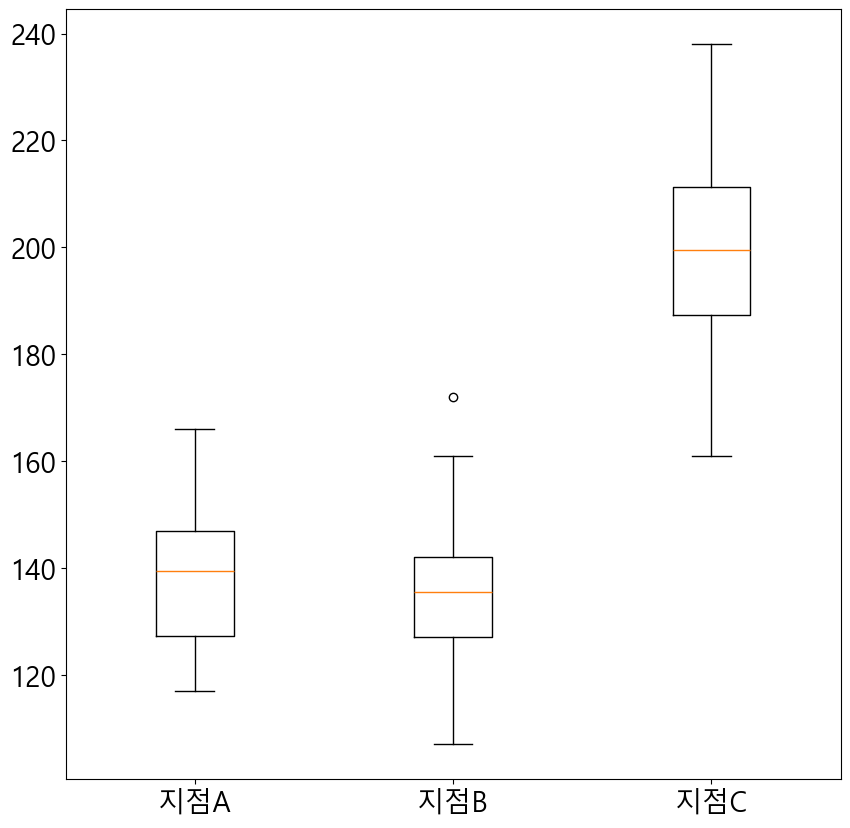

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (10,10)
plt.boxplot([A,B,C])
plt.xticks([1,2,3], ['지점A', '지점B', '지점C'])
plt.show()

In [7]:
from scipy.stats import *
print(kstest(A, 'norm'))
print(kstest(B, 'norm'))
print(kstest(C, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=117, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=107, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=161, statistic_sign=-1)


In [8]:
print(f_oneway(A,B,C))

F_onewayResult(statistic=178.43825416847133, pvalue=1.6337420285664805e-31)


In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [13]:
Group = ['A'] * len(A) + ['B'] * len(B) + ['C'] * len(C)
Data = A.tolist() + B.tolist() + C.tolist()

print(pairwise_tukeyhsd(Data, Group))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     -1.4 0.9297 -10.5741  7.7741  False
     A      C  62.2333    0.0  53.0592 71.4075   True
     B      C  63.6333    0.0  54.4592 72.8075   True
-----------------------------------------------------
